# Timeseries Airbnb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

sns.set()
sns.set_context("paper")

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Inspect Data
- data types
- dataset size (rows and columns)
- create descriptive statistics to summarize a distribution's the central tendency, dispersion and shape

In [3]:
df = pd.read_csv("./data/reviews_paris.csv")

display(df.shape, df.dtypes, df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

df.head(5)

(1103367, 2)

listing_id     int64
date          object
dtype: object

,listing_id
count,1.103367e+06
mean,1.017928e+07
std,8.061945e+06
min,3.109000e+03
25%,2.788739e+06
50%,8.362211e+06
75%,1.654273e+07
85%,2.000795e+07
95%,2.474977e+07
99%,2.812357e+07


,listing_id,date
0,3109,2016-12-27
1,3109,2016-12-28
2,3109,2017-10-28
3,3109,2017-11-03
4,3109,2018-02-12


# Transform The Data
- rename the columns
- group data by date and aggregate the number of reviews for each date
- convert the date series to a datetime64/int64 date column and use that as an index
- convert TimeSeries to a 1 Day Frequency and impute missing data with a 0

In [4]:
df = df.rename(columns={"date": "ds", "listing_id": 'ts'})

df2 = df.groupby(by="ds").agg({"ts": "count"})
 
df2.index = pd.to_datetime(df2.index)

df2.asfreq(freq='1D', fill_value=0)

df2.sort_index(ascending=True)

# inspect n values from a dataframe's head and tail
def ht_inspect(df, window = 10):
    return df.iloc[np.r_[0:window, (-1 * window):0]]

ht_inspect(df=df2, window = 5)

,ts
ds,
2009-06-30,1
2009-07-03,1
2009-07-08,1
2009-09-10,1
2009-09-28,1
2018-12-04,400
2018-12-05,338
2018-12-06,292
2018-12-07,162


# Plot the Time Series

Text(0.5, 0, 'Review Date')

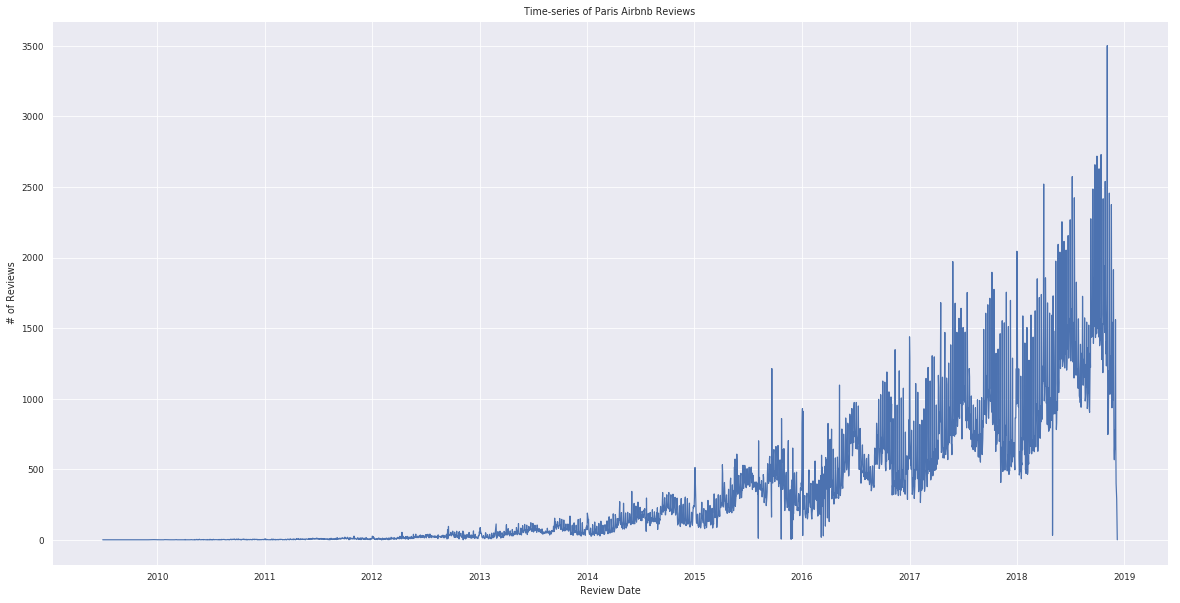

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.plot(df2[['ts']])

ax.set_title('Time-series of Paris Airbnb Reviews')
ax.set_ylabel('# of Reviews')
ax.set_xlabel('Review Date')

# ax.tick_params(axis = 'x', rotation = 45)

# Determine Data Stationarity
### Criterion:
- Mean must remain constant
- Variance must remain constant
- Autocovariance must remain constant

Without a Stationary Time Series, we cannot build a time series model. To determine Stationarity we'll use the Standard Deviation and Mean from rolling window calculations with 12 observations and Augmented Dickey-Fuller test


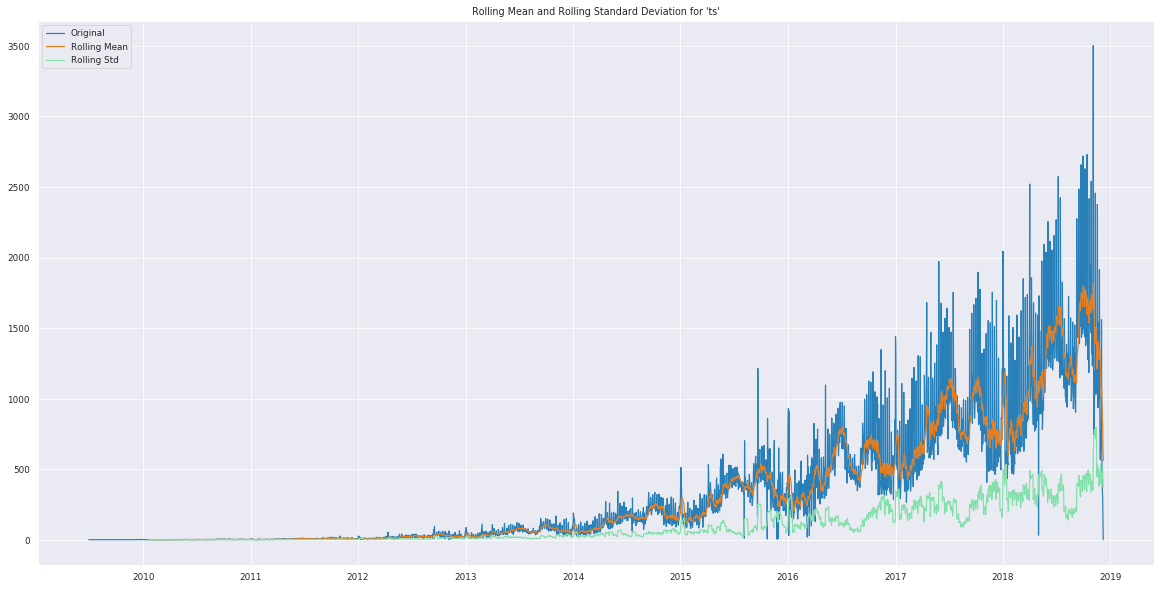


-------------------------------------
Dickey-Fuller Test:
-------------------------------------
          
Test statistic              -2.161472
p-value                      0.220525
# of lags used              29.000000
# of observations used    3089.000000
Critical Value 1%           -3.432469
Critical Value 5%           -2.862476
Critical Value 10%          -2.567268
dtype: float64


In [6]:
def stationarity(df, timeseries):
    window = df2[timeseries].rolling(window = 12)
    
    return {"rolling_mean": window.mean(), "rolling_stdev": window.std()}

def plot_stationarity(s, ts):
    plt.figure(figsize=(20,10))
    orig = plt.plot(df2[ts], color = "#2980B9", label = "Original")
    mean = plt.plot(s["rolling_mean"], color = "#E67E22", label = "Rolling Mean")
    std = plt.plot(s["rolling_stdev"], color = "#82E0AA", label = "Rolling Std")
    plt.title(f"Rolling Mean and Rolling Standard Deviation for \'{ts}\'")

    plt.legend()
    plt.show()
    
    plt.close()

# The Augmented Dickey-Fuller test tests for a unit root in a univariate process in the presence of serial correlation.
# The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.
# The p-values are obtained through regression surface approximation from MacKinnon 1994, but using the updated 2010 tables. If the p-value is close to significant, then the critical values should be used to judge whether to reject the null.
def dickey_fuller_test(df, timeseries):
    test = adfuller(df[timeseries])
    c_vals = lambda c : tuple(c.values())
    
    print("""
-------------------------------------
Dickey-Fuller Test:
-------------------------------------
          """)
    print(pd.Series(test[:4] + c_vals(test[4]), index=["Test statistic", "p-value", "# of lags used", "# of observations used", "Critical Value 1%", "Critical Value 5%", "Critical Value 10%"]))

s = stationarity(df = df2, timeseries = "ts")
    
plot_stationarity(s, "ts")
dickey_fuller_test(df = df2, timeseries = "ts")